In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/Wine_clust.csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

**K Means Clustering**

In [6]:
from sklearn.cluster import KMeans

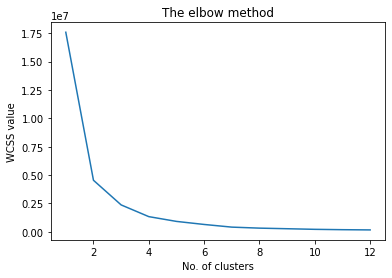

In [8]:
WCSS = []
for i in range (1,13):
  kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
  kmeans.fit(data)
  WCSS.append(kmeans.inertia_)
plt.plot(range(1,13),WCSS)
plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS value')
plt.show()

In [9]:
## The optimum number of clusters, k=2

In [10]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [11]:
data1=data.iloc[:,[10,12]]

In [12]:
data1

,Hue,Proline
0,1.04,1065
1,1.05,1050
2,1.03,1185
3,0.86,1480
4,1.04,735
...,...,...
173,0.64,740
174,0.70,750
175,0.59,835
176,0.60,840


In [13]:
type(data1)

pandas.core.frame.DataFrame

In [14]:
data1=pd.DataFrame.to_numpy(data1)

In [15]:
kmeans=KMeans(n_clusters=2,init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(data1)

In [16]:
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

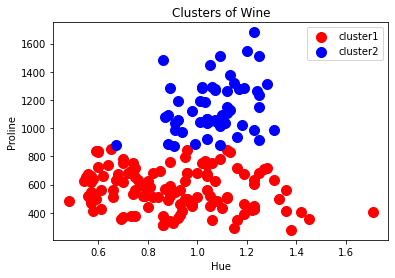

In [17]:
plt.scatter(data1[y_kmeans == 0,0], data1[y_kmeans == 0,1], s=100, c='red', label='cluster1')
plt.scatter(data1[y_kmeans==1,0],data1[y_kmeans==1,1],s=100,c='blue',label='cluster2')

plt.title('Clusters of Wine')
plt.xlabel('Hue')
plt.ylabel('Proline')
plt.legend()
plt.show()

Dendrograms

In [18]:
import scipy.cluster.hierarchy as sch

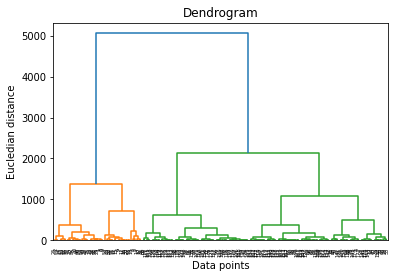

In [19]:
dendrogram=sch.dendrogram(sch.linkage(data1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Eucledian distance')
plt.show()

In [20]:
##Optimum number of clusters=2

Agglomerative Hierarchial Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data1)

In [23]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Silhouette Score

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
sil_avg=silhouette_score(data1,y_hc)

In [26]:
print(sil_avg)

0.6605374258209484


DB SCAN

In [57]:
data1

array([[1.040e+00, 1.065e+03],
       [1.050e+00, 1.050e+03],
       [1.030e+00, 1.185e+03],
       [8.600e-01, 1.480e+03],
       [1.040e+00, 7.350e+02],
       [1.050e+00, 1.450e+03],
       [1.020e+00, 1.290e+03],
       [1.060e+00, 1.295e+03],
       [1.080e+00, 1.045e+03],
       [1.010e+00, 1.045e+03],
       [1.250e+00, 1.510e+03],
       [1.170e+00, 1.280e+03],
       [1.150e+00, 1.320e+03],
       [1.250e+00, 1.150e+03],
       [1.200e+00, 1.547e+03],
       [1.280e+00, 1.310e+03],
       [1.070e+00, 1.280e+03],
       [1.130e+00, 1.130e+03],
       [1.230e+00, 1.680e+03],
       [9.600e-01, 8.450e+02],
       [1.090e+00, 7.800e+02],
       [1.030e+00, 7.700e+02],
       [1.110e+00, 1.035e+03],
       [1.090e+00, 1.015e+03],
       [1.120e+00, 8.450e+02],
       [1.130e+00, 8.300e+02],
       [9.200e-01, 1.195e+03],
       [1.020e+00, 1.285e+03],
       [1.250e+00, 9.150e+02],
       [1.040e+00, 1.035e+03],
       [1.190e+00, 1.285e+03],
       [1.090e+00, 1.515e+03],
       [

In [41]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [42]:
model=db.fit(data1)

In [43]:
label=model.labels_

In [44]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1,  2, -1, -1,  0, -1, -1,
        3, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1,  2, -1,  1,
       -1, -1,  4,  0,  5, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1,  4,
       -1, -1, -1, -1, -1, -1, -1,  0,  4, -1, -1, -1, -1, -1, -1, -1, -1,
        4,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1, -1,  1, -1, -1,  3,  2,
       -1, -1, -1, -1,  3, -1, -1,  4])

In [45]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 6


In [58]:
y_means=db.fit_predict(data1)

In [59]:
y_means

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1,  2, -1, -1,  0, -1, -1,
        3, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1,  2, -1,  1,
       -1, -1,  4,  0,  5, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1,  4,
       -1, -1, -1, -1, -1, -1, -1,  0,  4, -1, -1, -1, -1, -1, -1, -1, -1,
        4,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1, -1,  1, -1, -1,  3,  2,
       -1, -1, -1, -1,  3, -1, -1,  4])

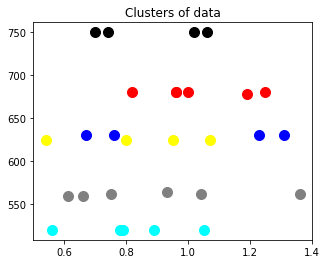

In [66]:
plt.figure(figsize=(5,4))
plt.scatter(data1[y_means==0,0],data1[y_means==0,1],s=100,c='red')
plt.scatter(data1[y_means==1,0],data1[y_means==1,1],s=100,c='cyan')
plt.scatter(data1[y_means==2,0],data1[y_means==2,1],s=100,c='blue')
plt.scatter(data1[y_means==3,0],data1[y_means==3,1],s=100,c='black')
plt.scatter(data1[y_means==4,0],data1[y_means==4,1],s=100,c='grey')
plt.scatter(data1[y_means==5,0],data1[y_means==5,1],s=100,c='yellow')
plt.title('Clusters of data')
plt.show()